<h1 align="center" style="color:brown;font-size:300%">CAT 2 - NLP</h1>


# <p style="padding:10px;background-color:#257aba ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 **[1. Introduction](#1)**

  - What is the dataset about?
    
  - Importance of this topic
   
   
 **[2. Objectives](#2)**


    
    
 **[3. Data set discussion ](#3)**

  - Libraries that we use in this application
  
  

   
  **[4. app.py making process](#4)**

  

 **[5. Result and Conclusion](#5)** 

  - Comparision of (Acc)s and (Loss)s
    
  - Conclusion
    
    
  **[6. References](#6)** 

    


    
    




<a id="1"></a><div class="alert alert-block alert-info" >
<b style="font-size:150%">INTRODUCTION<br><br></b>
    </div>

#### Problem Statement
You are a data scientist working with the `Sales/Service` company that aims to improve its product search and recommendation systems. The company also wants to provide a more meaningful interpretation of customer reviews to enhance user satisfaction. You are tasked with applying text processing and NLP techniques to solve key problems that customers and the business face.






<a id="2"></a><div class="alert alert-block alert-info" >
<b style="font-size:150%">OBJECTIVES<br><br>

</b>
</div>

`The main objectives of this assignment are as follows:`

- Standardize Customer Feedback: Develop a text processing pipeline to clean and normalize customer reviews by converting text to lowercase, removing unnecessary symbols, and tokenizing words. Calculate the total word count and identify the most frequently mentioned word.

- Correct Product Names: Implement an edit distance algorithm to compare customer search queries with correct product names, suggesting the correct product name if the edit distance is below a specified threshold.

- Build Bigram Language Model: Create a bigram language model from product descriptions to calculate term sequence probabilities and predict the next word for product search queries.

- Extract Entities with NER: Apply Named Entity Recognition (NER) to extract and categorize important entities such as product names and brands from customer reviews.

- Compute Cosine Similarity: Build word embeddings from product descriptions and reviews, calculate cosine similarity between product names, and visualize the embeddings to show how similar products cluster together.


```plaintext
+----------------------------------+
|            Start                 |
+----------------------------------+
                |
                v
+----------------------------------+
|   Load Required Libraries         |
+----------------------------------+
                |
                v
+----------------------------------+
|    Setup Streamlit Page           |
+----------------------------------+
                |
                v
+----------------------------------+
|         File Upload               |
+----------------------------------+
                |
                v
+----------------------------------+
|   If File Uploaded                |
+----------------------------------+
                |
                v
+----------------------------------+
| Read CSV File into DataFrame     |
+----------------------------------+
                |
                v
+----------------------------------+
|     Display Data Preview          |
+----------------------------------+
                |
                v
+----------------------------------+
| Standardize Customer Feedback    |
+----------------------------------+
                |
                v
+----------------------------------+
|  Clean and Tokenize Reviews      |
+----------------------------------+
                |
                v
+----------------------------------+
| Calculate Total Word Count       |
+----------------------------------+
                |
                v
+----------------------------------+
| Identify Most Frequent Word      |
+----------------------------------+
                |
                v
+----------------------------------+
| Edit Distance for Product        |
| Name Correction                  |
+----------------------------------+
                |
                v
+----------------------------------+
| Extract Product Names            |
+----------------------------------+
                |
                v
+----------------------------------+
| Real-Time Search Query Input     |
+----------------------------------+
                |
                v
+----------------------------------+
| Suggest Correct Product Names    |
+----------------------------------+
                |
                v
+----------------------------------+
| N-gram Language Model for        |
| Product Recommendations          |
+----------------------------------+
                |
                v
+----------------------------------+
|  Tokenize Reviews                |
+----------------------------------+
                |
                v
+----------------------------------+
| Build Bigram Model               |
+----------------------------------+
                |
                v
+----------------------------------+
| Predict Next Word Based on Query |
+----------------------------------+
                |
                v
+----------------------------------+
| Named Entity Recognition (NER)   |
| for Reviews                      |
+----------------------------------+
                |
                v
+----------------------------------+
| Extract Entities                 |
+----------------------------------+
                |
                v
+----------------------------------+
| Color-Code Entities              |
+----------------------------------+
                |
                v
+----------------------------------+
| Display Colored Entities         |
+----------------------------------+
                |
                v
+----------------------------------+
| Cosine Similarity and Word       |
| Embeddings                        |
+----------------------------------+
                |
                v
+----------------------------------+
| Extract Product Names            |
+----------------------------------+
                |
                v
+----------------------------------+
| Map Products to Reviews          |
+----------------------------------+
                |
                v
+----------------------------------+
| Calculate Cosine Similarity      |
+----------------------------------+
                |
                v
+----------------------------------+
| PCA for Visualization            |
+----------------------------------+
                |
                v
+----------------------------------+
| Plot PCA Results                 |
+----------------------------------+
                |
                v
+----------------------------------+
|            End                   |
+----------------------------------+


<a id="3"></a>
# Data set discussion

<div class="alert alert-block alert-success">
The dataset consists of 100 sports product reviews. The reviews cover a range of sports products, including footwear, apparel, accessories, and equipment. </div>

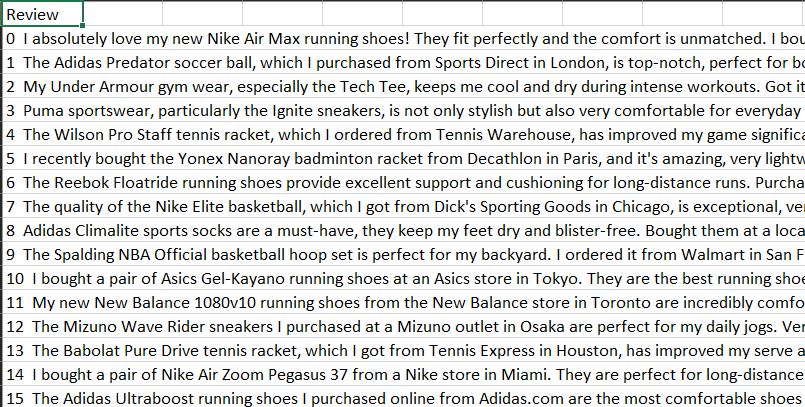
 


<a id="4"></a><div class="alert alert-block alert-info" >
<b style="font-size:150%">CODING THE app.py FILE <br><br></b>
    I have made a application that outlines the steps involved in the questions in an interactive way. Below is a video attached of the working.
    </div>

### This is the app.py file

In [73]:
import streamlit as st
import pandas as pd
import re
import nltk
import spacy
from collections import Counter, defaultdict
from nltk.util import ngrams
from scipy.spatial.distance import cosine
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

page_bg = f"""
<style>
[data-testid="stAppViewContainer"] > .main {{
background-image: url("https://res.cloudinary.com/dye74kvqk/image/upload/v1725017362/bg2_yurlw9.png");
background-size: cover;
background-position: top left;
background-repeat: no-repeat;
background-attachment: local;
}}

[data-testid="stSidebar"] > div:first-child {{
background-image: url("https://res.cloudinary.com/dye74kvqk/image/upload/v1725017362/bg2_yurlw9.png");
background-position: center; 
background-repeat: no-repeat;
background-attachment: fixed;
}}


[data-testid="stHeader"] {{
background: rgba(0,0,0,0);
}}

[data-testid="stToolbar"] {{
right: 2rem;
}}
</style>
"""

st.markdown(page_bg, unsafe_allow_html=True)

# Download necessary NLTK data
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')

# Function to clean and preprocess text
def prep_txt(txt):
    txt = txt.lower()
    txt = re.sub(r'[^\w\s]', '', txt)
    return nltk.word_tokenize(txt)

def clr_txt(txt):
    return re.sub(r'[^\w\s]', '', txt)

# Function to build bigram model
def bigram_model(tokens):
    bgs = list(ngrams(tokens, 2))
    bg_freq = Counter(bgs)
    unigram_freq = Counter(tokens)
    bg_prob = {bg: freq / unigram_freq[bg[0]] for bg, freq in bg_freq.items()}
    return bg_prob

# Function to extract entities with colored output
def color_entities(txt):
    doc = nlp(txt)
    colors = {
        "PRODUCT": "red",
        "ORG": "blue",
        "GPE": "green",
        "PERSON": "orange"
    }
    colored_txt = txt
    for ent in doc.ents:
        if ent.label_ in colors:
            colored_txt = colored_txt.replace(ent.text, f'<span style="color:{colors[ent.label_]}">{ent.text}</span>')
    return colored_txt

# Function to calculate edit distance
def edit_dist(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
    return dp[m][n]

def get_proper_nouns(txt):
    doc = nlp(txt)
    return [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"]]

# Function to suggest correction based on edit distance
def suggest_correction(query, products, thresh=2):
    suggestions = [(p, edit_dist(query.lower(), p.lower())) for p in products if edit_dist(query.lower(), p.lower()) <= thresh]
    suggestions.sort(key=lambda x: x[1])
    return [s[0] for s in suggestions]

# Function to extract product names
def get_product_names(txt):
    doc = nlp(txt)
    return [ent.text for ent in doc.ents if ent.label_ in ["PRODUCT", "ORG", "PROPN"]]

# Function to extract all product names from DataFrame
def all_product_names(df):
    names = [name for review in df['Review'] for name in get_product_names(review)]
    return list(set(names))

# Function to map product names to reviews
def map_products_to_reviews(df, products):
    prod_reviews = defaultdict(list)
    for idx, row in df.iterrows():
        review = row['Review']
        for product in products:
            if product in review:
                prod_reviews[product].append(review)
    return prod_reviews

# Function to compute cosine similarity
def cosine_sim(df):
    vec = TfidfVectorizer()
    texts = df['Review'].tolist()
    X = vec.fit_transform(texts)
    sim_matrix = cosine_similarity(X)
    return X, pd.DataFrame(sim_matrix, index=df.index, columns=df.index)

# Streamlit application layout
st.title("SportsScribe")

# File uploader
uploaded_file = st.file_uploader("Upload your CSV file with reviews. Make sure that the reviews are in the column named Review", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("Here is a preview of your data:")
    st.write(df.head())

    reviews = df['Review'].fillna('').sum()
    
    # Q1: Standardizing Customer Feedback for Analysis
    st.header("Q1: Standardizing Customer Feedback for Analysis")
    st.write("Processing reviews to clean and tokenize the text...")
    
    tokens = prep_txt(reviews)
    total_words = len(tokens)
    most_common_word, freq = Counter(tokens).most_common(1)[0]

    st.write(f"Total number of words: {total_words}")
    st.write(f"Most frequently mentioned word: '{most_common_word}' with a frequency of {freq}")

    # Q2: Edit Distance for Product Name Correction
    st.header("Q2: Edit Distance for Product Name Correction")
    st.write("Suggest a correct product name based on your input.")

    # Extract product names from reviews
    product_names = all_product_names(df)

    # Input box with real-time suggestions
    search_query = st.text_input("Enter a search query:", key="search_query")
    
    if search_query:
        suggestions = suggest_correction(search_query, product_names)
        if suggestions:
            st.write("Did you mean?:")
            st.write(", ".join(suggestions))
        else:
            st.write("No suggestions available")

    # Q3: N-gram Language Model for Product Recommendations
    st.header("Q3: N-gram Language Model for Product Recommendations")
    st.write("Predict the next word based on bigram probabilities.")

    search_query_bigram = st.text_input("Enter a search query for bigram prediction:")
    tokens = prep_txt(reviews)
    bigram_prob = bigram_model(tokens)

    if search_query_bigram:
        tokens_query = prep_txt(search_query_bigram)
        last_word = tokens_query[-1]
        candidates = [(w2, prob) for (w1, w2), prob in bigram_prob.items() if w1 == last_word]
        if candidates:
            next_word = max(candidates, key=lambda x: x[1])[0]
            st.write(f"Predicted next word: '{next_word}'")
        else:
            st.write("No prediction available")

    # Q4: Named Entity Recognition (NER) for Reviews
    st.header("Q4: Named Entity Recognition (NER) for Reviews")
    st.write("Extract entities from the reviews with color-coded text.")
    
    for review in df['Review'].head(10):  # Show only a few for display
        colored_text = color_entities(review)
        st.markdown(f"{colored_text}", unsafe_allow_html=True)

    # Q5: Product Names Mapping, Cosine Similarity, and Plotting
    st.header("Q5: Product Names Mapping, Cosine Similarity, and Plotting")
    
    # Extract product names
    product_names = all_product_names(df)
    st.write("Extracted Product Names:")
    st.write(product_names)

    # Map product names to reviews
    product_to_reviews = map_products_to_reviews(df, product_names)
    st.write("Product to Reviews Mapping:")
    # st.write(product_to_reviews)
    
    # Calculate cosine similarity
    X, sim_df = cosine_sim(df)
    st.write("Cosine Similarity between reviews:")
    st.write(sim_df)
    
    st.write("Visualizing product embeddings with PCA...")
    
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(X.toarray())
    
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
    
    for product, reviews in product_to_reviews.items():
        product_indices = [df[df['Review'] == review].index[0] for review in reviews if review in df['Review'].values]
        if product_indices:
            product_coords = np.mean(reduced_embeddings[product_indices], axis=0)
            plt.annotate(product, product_coords, fontsize=12)
    
    plt.title('Product Names in Review Space')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    st.pyplot(plt)


# <p style="padding:10px;background-color:#257aba ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">OUTPUT DEMO </p>

<video width="320" height="240" 
       src="vdeo.mp4"  
       controls>
</video>

<a id="6"></a>
# References:

1. For storage: https://www.researchgate.net/figure/Preprocessing-Storage-and-Processing-of-Texts-in-Text-Mining_fig2_215624034
2. Understanding preprocessing: http://text-processing.com/demo/stem/
3. Cosine Similarity: https://medium.com/@Coursesteach/natural-language-processing-part-28-cosine-similarity-intuition-68a4654d3cb2
4. Text processing further: https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/
5. Bigram: https://www.phontron.com/slides/nlp-programming-en-02-bigramlm.pdf
6. How to make streamlit application in python: https://www.datacamp.com/tutorial/streamlit#:~:text=Streamlit%20is%20a%20promising%20open,experience%20or%20knowledge%20is%20required.